<a href="https://colab.research.google.com/github/NIMZ-tech/Data-Analysis-Project-2/blob/main/sample_video_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***VIDEO GAME SALES ANALYSIS***





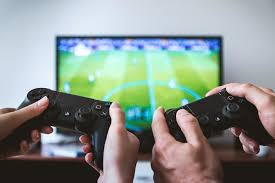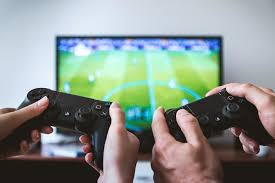

####Playing video games has become a customary and important part of everyday life for today’s youth, and the broader education community has been exploring the affordances of video games to support various competencies that are valuable for success in the twenty-first century.
####A video game or computer game is an electronic game that involves interaction with a user interface or input device – such as a joystick, controller or keyboard.
####The first consumer video game is the arcade video game Computer Space in 1971.


####This Project is to perform the analysis on the Video Games Sales across the countries. Used various libraries of Python for visualization of Data.
####Collected information about the data from kaggle and size of data is (16598,11)
####In this project, I will analyze the video game sales. First of all, I would like to examine the most sold games in the global perspective, then examine the games in terms of genre and platform, the game genres according to the region , word colud with game names and finally the year of the games are released and their publishers. Also some information are given about games, publishers and platforms
##Content:
##Dataset: Video Game Sales Data






### Here is what each column denotes.


*   Rank — Ranking of overall sales
*   Name — The games name




*   Platform — Platform of the game's release (i.e. PC, PS4, etc.)

*   Year — Year of the game’s release

*   Genre — Genre of the game

*    Publisher — Publisher of the game
*   NA_Sales — Sales in North America (in millions)


*   EU_Sales — Sales in Europe (in millions)


*   JP_Sales — Sales in Japan (in millions)


*   Other_Sales — Sales in the rest of the world (in millions)

*   Global_Sales — Total worldwide sales.










In [ ]:
#import all the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Data Download
####csv file for data is collected from Kaggle.com

In [ ]:
#read the data
df=pd.read_csv("/content/drive/MyDrive/sales/vgsales.csv (1).zip")

In [ ]:
#show the first 10 rows data
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


#Data Preparation & Cleaning

In [ ]:
#show all columns names
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
#show the shape of the data set
df.shape

(16598, 11)

Our data set contains 16598 rows and 11 columns

In [ ]:
#show the last 10 rows of data set
df.tail(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16588,16591,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.0,0.01
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016.0,Action,dramatic create,0.00,0.00,0.01,0.0,0.01
16590,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.0,0.01
16591,16594,Myst IV: Revelation,PC,2004.0,Adventure,Ubisoft,0.01,0.00,0.00,0.0,0.01
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.0,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01


In [ ]:
#set the Rank column as index
df.set_index('Rank',inplace=True)

In [ ]:
df.shape

(16598, 10)

In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
#To get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


#Data Cleaning and Preprocessing

In [ ]:
#null values handle
df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Out of 10 columsn in our data set both Publisher and Year columns cotains null values.So we have to handle these null values

In [ ]:
df.isnull().sum()[df.isnull().sum() !=0]

Year         271
Publisher     58
dtype: int64

In [ ]:
#null values handle in publisher column
df['Publisher']=df['Publisher'].fillna(0)
df.Publisher.value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Merscom LLC                        1
Vap                                1
Extreme Entertainment Group        1
Giza10                             1
SSI                                1
Name: Publisher, Length: 579, dtype: int64

The 58 null values in the publisher column is filled with zero.

In [ ]:
# there are quite a few rows w/o year
print('Year missing: ', sum(df.Year.isna()))
# let's remove those
df = df[~df.Year.isna()]
# and convert to int
df.Year = df.Year.astype(int)

Year missing:  271


The 271 missing values in the Year column is dropped

#Univariate Analysis

In [ ]:
#show some statistical details of numerical columns
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
#show some details of Genre column
df.Genre.describe()

count      16327
unique        12
top       Action
freq        3253
Name: Genre, dtype: object

In [ ]:
df.Name.describe()

count                           16327
unique                          11360
top       Need for Speed: Most Wanted
freq                               12
Name: Name, dtype: object

In [ ]:
df.	Publisher.describe()

count               16327
unique                577
top       Electronic Arts
freq                 1339
Name: Publisher, dtype: object

In [ ]:
#show number of counts in each genre
df.Genre.value_counts()

Action          3253
Sports          2304
Misc            1710
Role-Playing    1471
Shooter         1282
Adventure       1276
Racing          1226
Platform         876
Simulation       851
Fighting         836
Strategy         671
Puzzle           571
Name: Genre, dtype: int64

In [ ]:
df.Name.value_counts()

Need for Speed: Most Wanted                 12
FIFA 14                                      9
Ratatouille                                  9
LEGO Marvel Super Heroes                     9
Madden NFL 07                                8
                                            ..
ef - a fairy tale of the two.                1
Descent Maximum                              1
Looney Tunes: Duck Amuck                     1
Warhammer 40,000: Dawn of War: Soulstorm     1
Exhibition Volume 02                         1
Name: Name, Length: 11360, dtype: int64

In [ ]:
df.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
King Records                       1
Paon Corporation                   1
Game Arts                          1
Phoenix Games                      1
Nexon                              1
Name: Publisher, Length: 577, dtype: int64

In [ ]:
df.Year.value_counts()

2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
2012     657
2015     614
2014     582
2013     546
2001     482
1998     379
2000     349
2016     344
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: Year, dtype: int64

In [ ]:
df[df['Year']==2020]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
5959,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


#Data Visualization and Questions Analysis



*   find the count of each Genre in the dataset?





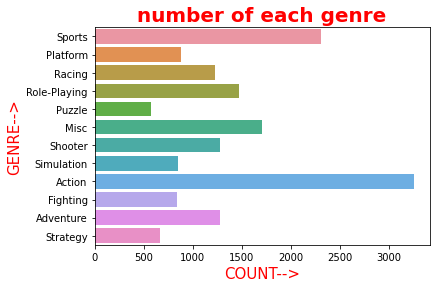

In [ ]:
plt.figure(figsize=(6,4))
plt.style.use('default')
plt.title('number of each genre',color='red',size=20, weight='bold')
sns.countplot(y='Genre',data=df)
plt.xlabel('COUNT-->',color='red',size=15)
plt.ylabel('GENRE-->',color='red',size=15)
plt.savefig('one',bbox_inches='tight')
plt.show()

Insight-

Action is the top most video game genre,Sports holds the second position.
Where puzzle and Strategy are bottom position



*   find in which platform video games are mostly playing?



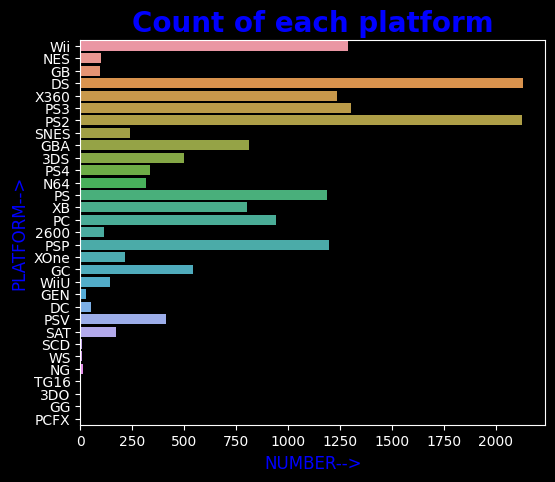

In [ ]:
plt.figure(figsize=(6,5))
plt.style.use('dark_background')
plt.title('Count of each platform',color='blue',size=20, weight='bold')
sns.countplot(y='Platform',data=df)
plt.xlabel('NUMBER-->',color='blue',size=12)
plt.ylabel('PLATFORM-->',color='blue',size=12)
plt.savefig('two',bbox_inches='tight')
plt.show()

Insight-

In the data set we see that the platforms with the most games are PS2 and DS



*   number of top 100 video game publishers?



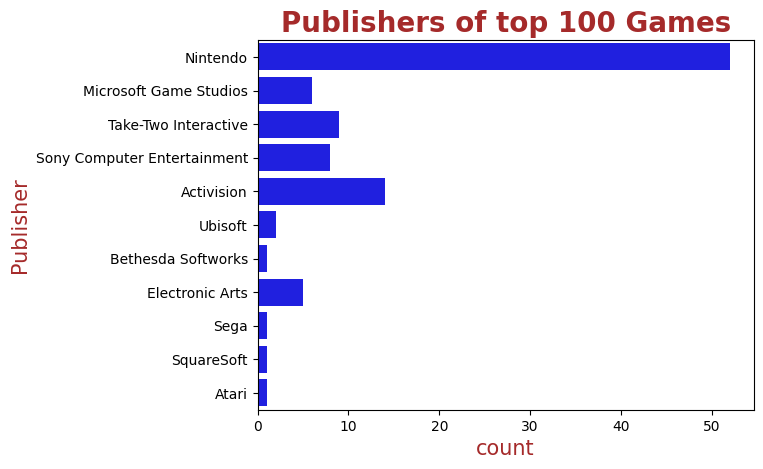

In [ ]:
a = df['Publisher'][:100]
plt.style.use('default')
plt.title('Publishers of top 100 Games',color='brown',size=20, weight='bold')
plt.xlabel('COUNT-->',color='brown',size=15)
plt.ylabel('PUBLISHER-->',color='brown',size=15)
sns.countplot(y=a,data=df,color='blue')
plt.savefig('three',bbox_inches='tight')

Insight-

more than 50 of these 100 games were published by Nintendo. Activison comes in 2nd place and Take-Two Interactive in 3rd place



*   find which genre of videogame is published by Nintendo mostly?



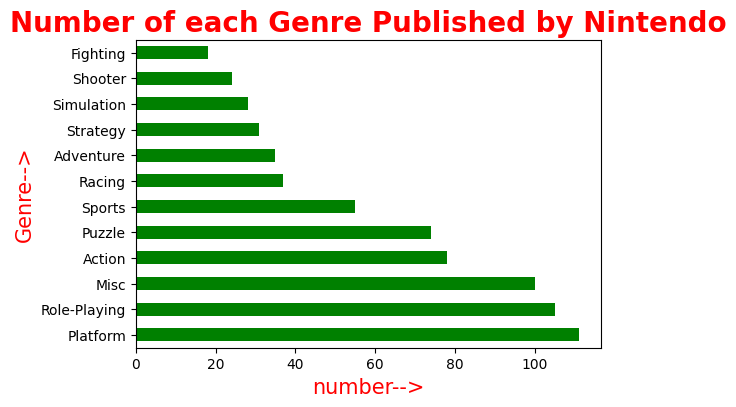

In [ ]:
plt.figure(figsize=(6,4))
plt.style.use('default')
df[df['Publisher']=='Nintendo']['Genre'].value_counts().plot(kind='barh',color='green')
plt.title('Number of each Genre Published by Nintendo',color='red',size='20', weight='bold')
plt.xlabel('number-->',color='red',size=15)
plt.ylabel('Genre-->',color='red',size=15)
plt.savefig('four',bbox_inches='tight')


Insight-

The top 3 genre of games that published by Nintendo are PLATFORM,ROLE-PLAYING,MISC.
Where the least one is FIGHTING



*   percentage of sales by each region?



In [ ]:
# percentage of sales by each region
NA_total = df.NA_Sales.sum()
EU_total = df.EU_Sales.sum()
JP_total = df.JP_Sales.sum()
Other_total = df.Other_Sales.sum()
Global_total = NA_total + EU_total + JP_total + Other_total

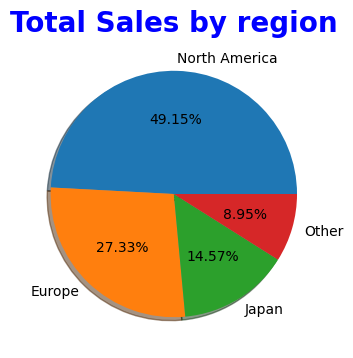

In [ ]:
plt.figure(figsize=(6,4))
plt.style.use('default')
plt.pie([NA_total, EU_total, JP_total, Other_total], labels=['North America','Europe','Japan','Other'],
       autopct='%1.2f%%', shadow=True)
plt.title('Total Sales by region',color='blue',size=20, weight='bold')
plt.savefig('22',bbox_inches='tight')
plt.show()

Insight-

North America almost Cover 50% of sale,and holds toppest position



*   What are the most 5 popular games on a global platform?



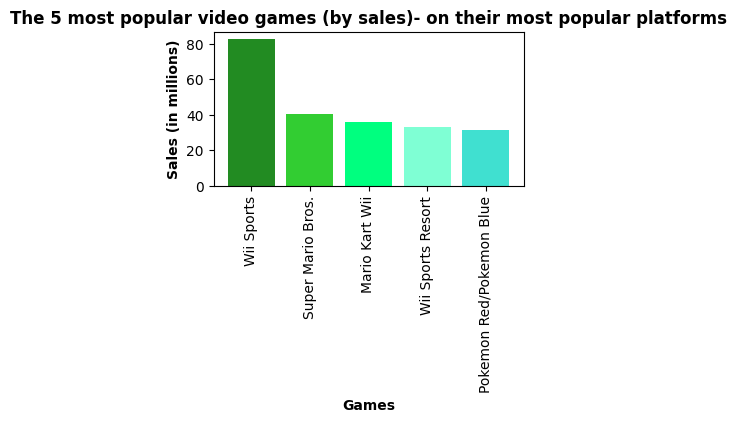

In [ ]:
a = df['Name'][:5]
b = df['Global_Sales'][:5]

plt.figure(figsize=[4,2])
plt.title('The 5 most popular video games (by sales)- on their most popular platforms', 
          weight='bold')
plt.xlabel('Games', weight='bold')
plt.ylabel('Sales (in millions)', weight='bold')
plt.xticks(rotation=90)
plt.bar(a, b, color=['forestgreen', 'limegreen', 'springgreen', 'aquamarine', 'turquoise'])
plt.savefig('23',bbox_inches='tight')
plt.show()

Insight-

The top 5 most popular video games are Wii Sports,Super Mario Bros,Mario Kart Wii,Wii Sports Resort and Pokemon Red/Blue

In [ ]:
df_annual_regional_sales = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
df_annual_regional_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980,10.59,0.67,0.00,0.12
1981,33.40,1.96,0.00,0.32
1982,26.92,1.65,0.00,0.31
1983,7.76,0.80,8.10,0.14
1984,33.28,2.10,14.27,0.70
1985,33.73,4.74,14.56,0.92
1986,12.50,2.84,19.81,1.93
1987,8.46,1.41,11.63,0.20
1988,23.87,6.59,15.76,0.99




* In which year sales of each region is maximum?



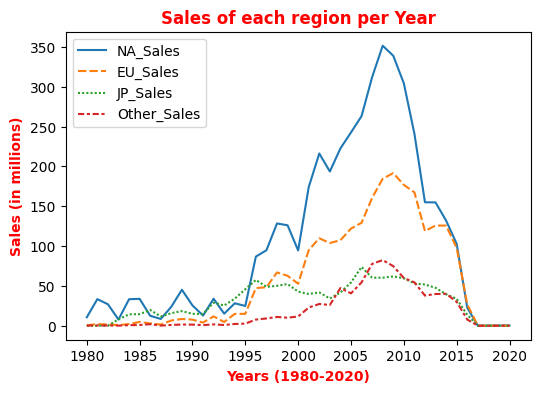

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Sales of each region per Year', 
          weight='bold',color='red')
plt.xlabel('Years (1980-2020)', weight='bold',color='red')
plt.ylabel('Sales (in millions)', weight='bold',color='red')
sns.lineplot(data=df_annual_regional_sales)
plt.savefig('five',bbox_inches='tight')

Insight-

We see that video game sales reached its peak from around 2005-2010, but sales have since significantly dropped,Wii Sports holds the 1st posiion




*   Find the count of global sales by each Platform?



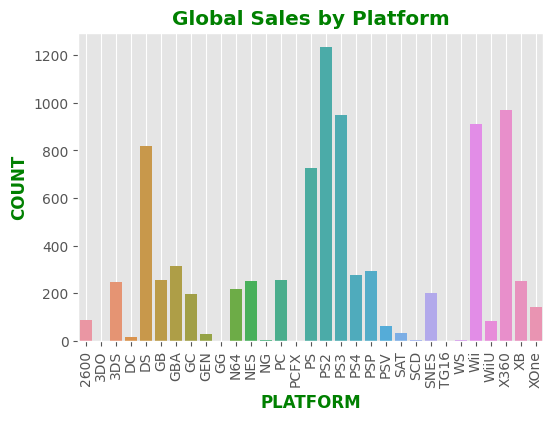

In [ ]:
sales_by_platform = df.groupby(by='Platform').Global_Sales.sum()
plt.figure(figsize=(6,4))
plt.style.use('ggplot')
sns.barplot(x=sales_by_platform.index, y=sales_by_platform.values)
plt.title('Global Sales by Platform',color='green',weight='bold')
plt.xlabel('PLATFORM', weight='bold',color='green')
plt.ylabel('COUNT', weight='bold',color='green')
plt.grid()
plt.xticks(rotation=90)
plt.savefig('seven',bbox_inches='tight')
plt.show()

Insight-

The biggest platform of Global Sales is PS2,followed by this the other top platforms are X360,PS3,DS,Wii



*   Find the count of global sales by each Genre?



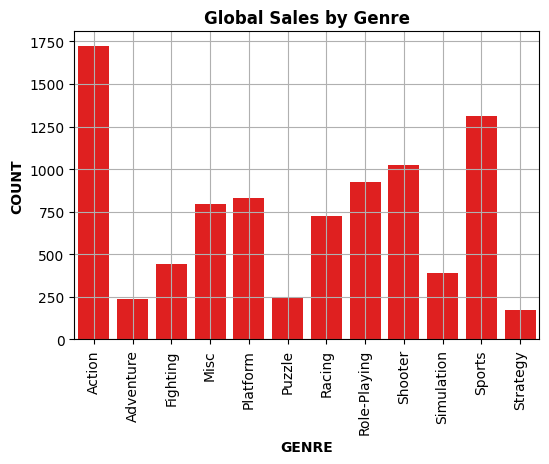

In [ ]:
sales_by_genre = df.groupby(by='Genre').Global_Sales.sum()
plt.figure(figsize=(6,4))
plt.style.use('default')
sns.barplot(x=sales_by_genre.index, y=sales_by_genre.values,color='red')
plt.title('Global Sales by Genre',weight='bold')
plt.xlabel('GENRE', weight='bold')
plt.ylabel('COUNT', weight='bold')
plt.grid()
plt.xticks(rotation=90)
plt.savefig('eight',bbox_inches='tight')
plt.show()

Insight-

Here strategy is the bottom position and Action holds 1st position



*   In which year global sale is toppest and also least?


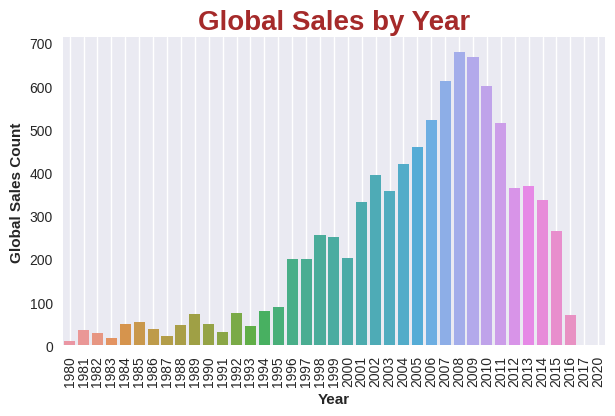

In [ ]:
#In which year global sale is toppest and also least?
global_sales = df.groupby(by='Year').Global_Sales.sum()
plt.figure(figsize=(7,4))
plt.style.use('seaborn')
sns.barplot(x=global_sales.index, y=global_sales.values)
plt.title('Global Sales by Year',weight='bold',size=20,color='brown')
plt.xlabel('Year', weight='bold')
plt.ylabel('Global Sales Count', weight='bold')
plt.grid()
plt.xticks(rotation=90)
plt.savefig('nine',bbox_inches='tight')
plt.show()

Insight-

The global sales is maximum in year 2008,least in 2020 and 2017

In [ ]:
df_sales_split_by_year = df.groupby(
     ['Year']
 ).agg(
     NorthAmerica = ('NA_Sales','sum'),
     Europe = ('EU_Sales','sum'),
     Japan = ('JP_Sales','sum'),
     Other = ('Other_Sales','sum')
 ).reset_index()


In [ ]:
df_sales_split_by_year

,Year,NorthAmerica,Europe,Japan,Other
0,1980,10.59,0.67,0.00,0.12
1,1981,33.40,1.96,0.00,0.32
2,1982,26.92,1.65,0.00,0.31
3,1983,7.76,0.80,8.10,0.14
4,1984,33.28,2.10,14.27,0.70
5,1985,33.73,4.74,14.56,0.92
6,1986,12.50,2.84,19.81,1.93
7,1987,8.46,1.41,11.63,0.20
8,1988,23.87,6.59,15.76,0.99
9,1989,45.15,8.44,18.36,1.50




*   Name the top 10 North American,Europe,Japan,other Video Games?


In [ ]:
df_NA = df.sort_values(by='NA_Sales', ascending=False)
df_NA = df_NA.reset_index(drop=True)
df_NA.index = df_NA.index + 1 # start index with 1 => index = (local) rank
df_NA.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
4,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
5,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
6,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
10,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61


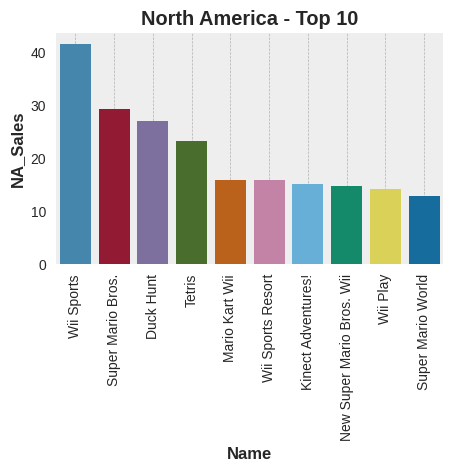

In [ ]:
#NORTH AMERICA

plt.figure(figsize=(5,3))
plt.style.use('bmh')
sns.barplot(x=df_NA.Name[0:10], y=df_NA.NA_Sales[0:10])
plt.title('North America - Top 10',weight='bold')
plt.xlabel('Name', weight='bold')
plt.ylabel('NA_Sales', weight='bold')
plt.grid()
plt.xticks(rotation=90)
plt.savefig('ten',bbox_inches='tight')
plt.show()

Here in North America the top most video game is Wii Sports

In [ ]:
#EUROPE

df_Europe = df.sort_values(by='EU_Sales', ascending=False)
df_Europe = df_Europe.reset_index(drop=True)
df_Europe.index = df_Europe.index + 1 # start index with 1 => index = (local) rank
df_Europe.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
5,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
6,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
10,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00


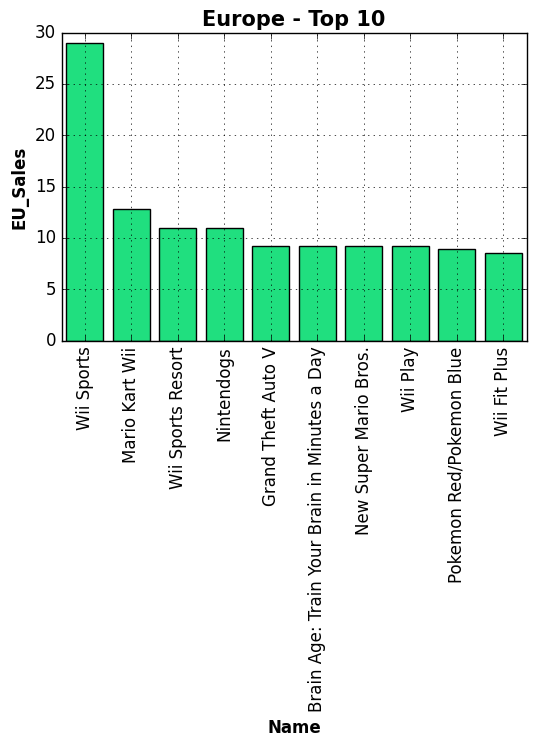

In [ ]:
plt.figure(figsize=(6,4))
plt.style.use('classic')
sns.barplot(x=df_Europe.Name[0:10], y=df_Europe.EU_Sales[0:10],color='springgreen')
plt.title('Europe - Top 10',weight='bold',size=15)
plt.ylabel('EU_Sales', weight='bold')
plt.xlabel('Name', weight='bold')
plt.grid()
plt.xticks(rotation=90)
plt.savefig('eleven',bbox_inches='tight')
plt.show()

Like North America In Europe also the toppest position is Wii Sports

In [ ]:
#JAPAN

df_Japan = df.sort_values(by='JP_Sales', ascending=False)
df_Japan = df_Japan.reset_index(drop=True)
df_Japan.index = df_Japan.index + 1 # start index with 1 => index = (local) rank
df_Japan.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
2,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
3,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
4,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
5,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
6,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
7,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
8,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.27
9,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
10,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87


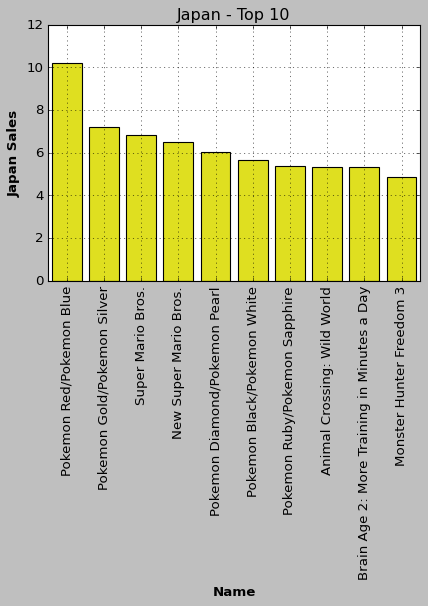

In [ ]:
plt.figure(figsize=(6,4))
plt.style.use('grayscale')
sns.barplot(x=df_Japan.Name[0:10], y=df_Japan.JP_Sales[0:10],color='yellow')
plt.title('Japan - Top 10')
plt.xlabel('Name', weight='bold')
plt.ylabel('Japan Sales', weight='bold')
plt.grid()
plt.xticks(rotation=90)
plt.savefig('12',bbox_inches='tight')
plt.show()

In Japan Pokemon Red/Pokemon Blue is toppest

In [ ]:
#OTHERS

df_Other = df.sort_values(by='Other_Sales', ascending=False)
df_Other = df_Other.reset_index(drop=True)
df_Other.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
3,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
4,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
5,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,Pro Evolution Soccer 2008,PS2,2007,Sports,Konami Digital Entertainment,0.05,0.00,0.64,2.93,3.63
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76


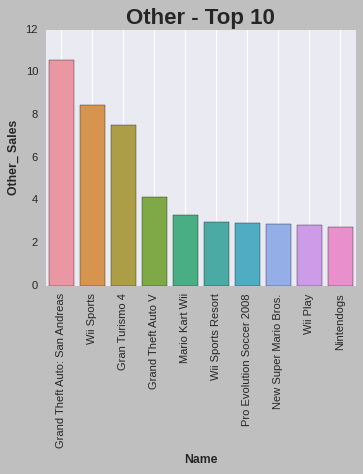

In [ ]:
plt.figure(figsize=(5,4))
plt.style.use('seaborn')
sns.barplot(x=df_Other.Name[0:10], y=df_Other.Other_Sales[0:10])
plt.title('Other - Top 10',weight='bold',size=20)
plt.xlabel('Name', weight='bold')
plt.ylabel('Other_ Sales', weight='bold')
plt.grid()
plt.xticks(rotation=90)
plt.savefig('13',bbox_inches='tight')
plt.show()

In other sales Grand Theft Auto is holds 1st, Also here Wii Sports also plays a big role



*   In which platform Sports genre is mostly playing?



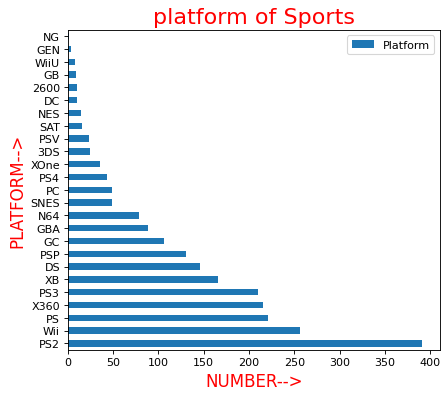

In [ ]:
plt.figure(figsize=(6,5))
plt.style.use('default')
df[df['Genre']=='Sports']['Platform'].value_counts().plot(kind='barh')
plt.title('platform of Sports',color='red',size='20')
plt.xlabel('NUMBER-->',color='red',size=15)
plt.ylabel('PLATFORM-->',color='red',size=15)
plt.savefig('14',bbox_inches='tight')
plt.legend()

Sports Games are mostly playing in PS2,Wii platforms.



*   In which platform Action genre is mostly playing?


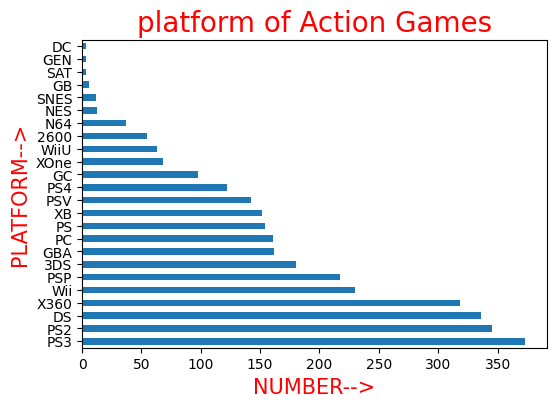

In [ ]:
plt.figure(figsize=(6,4))
plt.style.use('default')
plt.title('platform of Action Games',color='red',size='20')
plt.xlabel('NUMBER-->',color='red',size=15)
plt.ylabel('PLATFORM-->',color='red',size=15)
df[df['Genre']=='Action']['Platform'].value_counts().plot(kind='barh')
plt.savefig('15',bbox_inches='tight')


Action Games are mostly playing in PS2,PS3 platforms.



*   In which platform Misc genre is mostly playing?



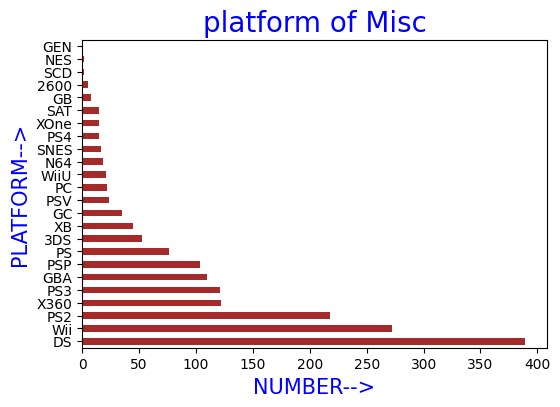

In [ ]:
#In which platform Misc genre is mostly playing?
plt.figure(figsize=(6,4))
plt.style.use('default')
plt.title('platform of Misc',color='blue',size='20')
plt.xlabel('NUMBER-->',color='blue',size=15)
plt.ylabel('PLATFORM-->',color='blue',size=15)
df[df['Genre']=='Misc']['Platform'].value_counts().plot(kind='barh',color='brown')
plt.savefig('16',bbox_inches='tight')


Misc Games are mostly playing in DS,Wii platforms.



*   In which platform Role-Playing genre is mostly playing?



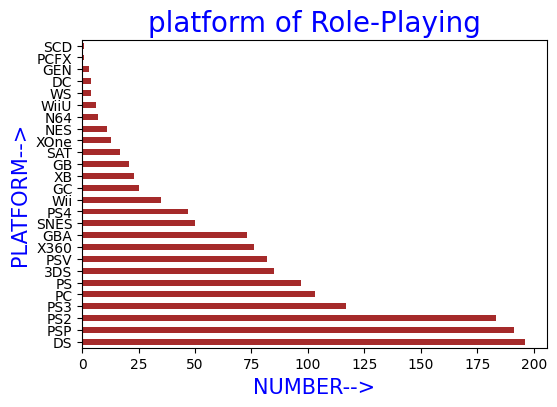

In [ ]:
plt.figure(figsize=(6,4))
plt.style.use('default')
plt.title('platform of Role-Playing',color='blue',size='20')
plt.xlabel('NUMBER-->',color='blue',size=15)
plt.ylabel('PLATFORM-->',color='blue',size=15)
df[df['Genre']=='Role-Playing']['Platform'].value_counts().plot(kind='barh',color='brown')
plt.savefig('17',bbox_inches='tight')


Role-Playing Games are mostly playing in DS,PSP platforms.

In [ ]:
g=df.groupby('Genre')
u=g['Year'].agg(np.mean)
print(u)

Genre
Action          2007.909929
Adventure       2008.130878
Fighting        2004.630383
Misc            2007.258480
Platform        2003.820776
Puzzle          2005.243433
Racing          2004.840131
Role-Playing    2007.055744
Shooter         2005.918877
Simulation      2006.567568
Sports          2005.477865
Strategy        2005.599106
Name: Year, dtype: float64




* Mean Year in which each genre of games released?  



No handles with labels found to put in legend.


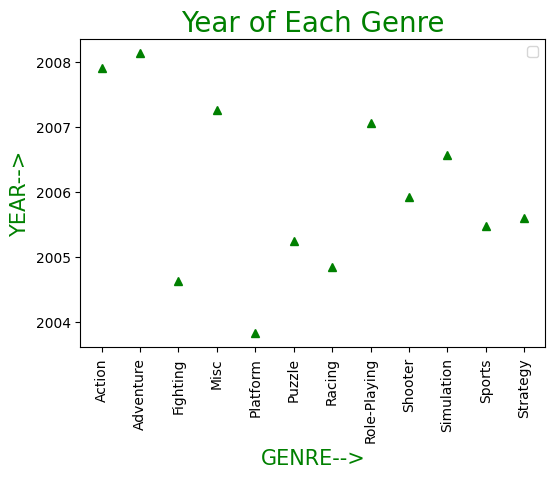

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(u,'g^',color='green')
plt.xticks(rotation=90)
plt.style.use('default')
plt.title('Year of Each Genre',color='green',size='20')
plt.xlabel('GENRE-->',color='green',size=15)
plt.ylabel('YEAR-->',color='green',size=15)
plt.legend()
plt.savefig('18',bbox_inches='tight')
plt.show()

Insight-

Most of the Action games are released in the year between 2007 and 2008.All genre of video games are released between 2004 and 2008



*   Find the number of Publishers in each Genre?



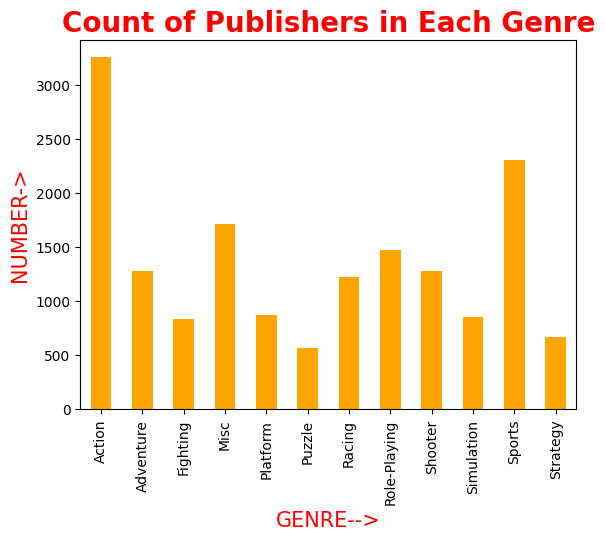

In [ ]:
plt.style.use('default')
df.groupby(['Genre'])['Publisher'].count().plot.bar(color="orange")
plt.title('Count of Publishers in Each Genre',color='red',size='20',weight='bold')
plt.xlabel('GENRE-->',color='red',size=15)
plt.ylabel('NUMBER->',color='red',size=15)
plt.savefig('199',bbox_inches='tight')

Insight-

The number of publishers is maximum in action genre of games



*   Find the boxplot of genre and year?



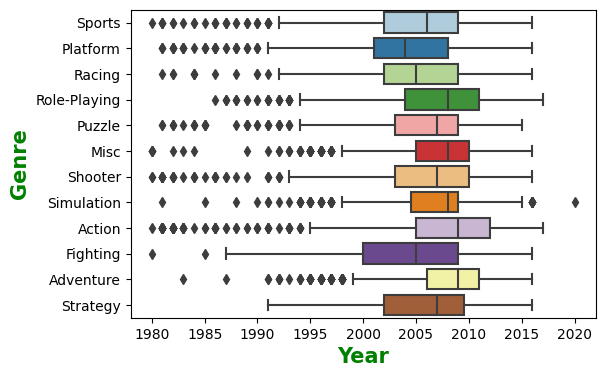

In [ ]:
#Find the boxplot of genre and year?
plt.figure(figsize=(6,4))
plt.style.use('default')
plt.xlabel('YEAR', weight='bold',color='green',size=15)
plt.ylabel('GENRE', weight='bold',color='green',size=15)
sns.boxplot(x='Year', y='Genre', data= df, palette='Paired')
plt.savefig('20',bbox_inches='tight')

Insight-

from the box plot we can concluded that most of the game genre there median is between 2005-2010



*   Find the correlation of each numerical columns in the data set?



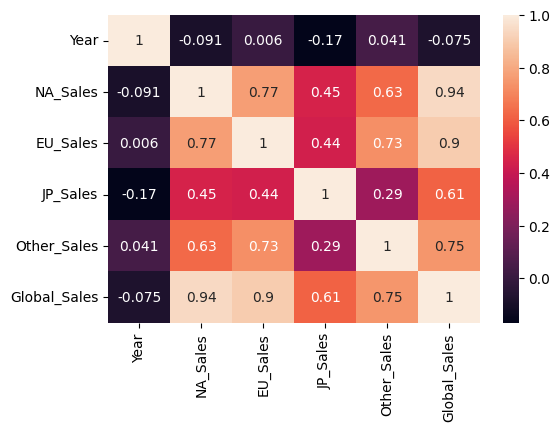

In [ ]:
plt.figure(figsize=(6,4))
plt.style.use('default')
sns.heatmap(df.corr(),annot=True)
plt.savefig('21',bbox_inches='tight')

Insight-

We can NA_Sales and EU_sales have much effect in Global_Sales. And NA_Sales and EU_sales are mostly corelated

#inference and conclusions from the analysis


*   Action games are the more preferable games followed by sports,Thereby a new game launcher in action genre has high probability of getting the maximum sales

*   Japan is quite more stable in terms of sales through out decades.Though North America shows the highest sales.

*   Publisher Nintendo has earned more revenue so, we may follow their business strategy.

*   Gamming console like PS2,X360,Wii and DS more preferable platform for gamer.

*   North American Sales and European Sales have much effect in Global Sales
*   The number of publishers is maximum in action genre of games


*   We see that video game sales reached its peak from around 2005-2010, but sales have since significantly dropped,Global Sale is maximum in the Year 2008


*   North America almost Cover 50% of sale,and holds toppest position


*   The games like sports and Misc Categories are mostly playing in Wii platform.


*   Both North America And Europe region Wii Sports hold first Position.So in future this platform has a better chance.


*   The trend of video game sales for North America has drastically decreased from 2008 which had highest sales recorded as about 350 million dollars.




